# Synthetic Skewed Gaussian Pulse

## Skewed Gaussian Function  

The pulse is modeled using a **skewed Gaussian function**:

$$
f(x) =
\begin{cases}
A \exp\left(-\frac{(x - \mu)^2}{2\sigma_{\text{left}}^2}\right), & x < \mu \\  
A \exp\left(-\frac{(x - \mu)^2}{2\sigma_{\text{right}}^2}\right), & x \geq \mu  
\end{cases}
$$

where:  

- Peak position:  $ \mu $  

- Amplitude:  $ A $  

- Standard deviation on the left side:  $ \sigma_{\text{left}} $  

- Standard deviation on the right side:  $ \sigma_{\text{right}} $  

---

## Threshold Calculation  

The theoretical positions where intensity falls to **10%** of \( A \) are derived from:  

$$
A \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right) = 0.1A
$$

Dividing by \( A \) and taking the **natural logarithm**:  

$$
-\frac{(x - \mu)^2}{2\sigma^2} = \ln(0.1)
$$

Solving for \( x \):  

$$
|x - \mu| = \sqrt{2 \sigma^2 (-\ln 0.1)}
$$

Thus, the **left and right threshold positions** are:  

$$
x_{\text{left}} = \mu - \sqrt{2 \sigma_{\text{left}}^2 (-\ln 0.1)}
$$  

$$
x_{\text{right}} = \mu + \sqrt{2 \sigma_{\text{right}}^2 (-\ln 0.1)}
$$  

---

## Noise Addition  

Gaussian noise is added to the pulse:  

$$
y_{\text{noisy}} = f(x) + \mathcal{N}(0, \sigma_{\text{noise}})
$$

where  $ \mathcal{N}(0, \sigma_{\text{noise}}) $  represents **Gaussian noise** with zero mean and standard deviation $\sigma_{\text{noise}}$.  

---

## Visualization  

- The pulse is plotted as both a **line plot** and **scatter plot**.  
- Vertical lines are drawn at:  

  - **Peak position** ( $ \mu $ ), in **red**  
  - **Left 10% threshold** ( $ x_{\text{left}} $ ), in **green**  
  - **Right 10% threshold** ( $ x_{\text{right}} $ ), in **orange**  


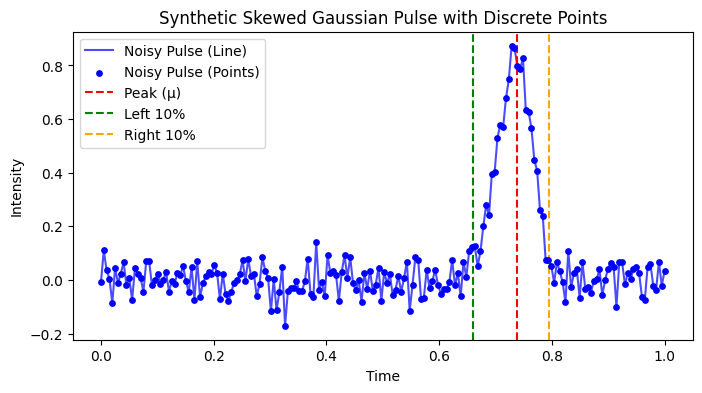

Peak (μ): 0.7385180675426091
Left 10% position: 0.6608272561975099
Right 10% position: 0.7952341688561271


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(42)


# Define a skewed Gaussian function
def skewed_gaussian(x, mu, sigma_left, sigma_right, A):
    """
    Returns a skewed Gaussian pulse:
      For x < mu:  A * exp(-((x-mu)^2) / (2*sigma_left^2))
      For x >= mu: A * exp(-((x-mu)^2) / (2*sigma_right^2))
    """
    return np.where(x < mu,
                    A * np.exp(-((x - mu)**2) / (2 * sigma_left**2)),
                    A * np.exp(-((x - mu)**2) / (2 * sigma_right**2)))

def generate_pulse(window_length=200, T=1.0, noise_std=0.05):
    """
    Generates a synthetic pulse in a discrete window.

    Parameters:
      window_length: number of discrete time points
      T: total duration (time range from 0 to T)
      noise_std: standard deviation of additive Gaussian noise

    Returns:
      x: time vector
      noisy_signal: synthetic noisy intensity values
      mu: true peak position
      left_thresh: theoretical left 10% threshold position
      right_thresh: theoretical right 10% threshold position
    """
    # Create time axis (discrete samples)
    x = np.linspace(0, T, window_length)

    # Randomly choose a peak position (avoid edges so thresholds are in-bound)
    mu = np.random.uniform(T*0.2, T*0.8)
    # Random amplitude around 1
    A = np.random.uniform(0.8, 1.2)
    # Random standard deviations for left and right side
    sigma_left = np.random.uniform(0.01, 0.05)
    sigma_right = np.random.uniform(0.01, 0.05)

    # Generate the clean pulse signal
    clean_signal = skewed_gaussian(x, mu, sigma_left, sigma_right, A)

    # Calculate theoretical positions where intensity falls to 10% of A.
    # Solve: exp(-((x-mu)^2)/(2*sigma^2)) = 0.1  ==>  |x-mu| = sqrt(2 * sigma^2 * (-ln(0.1)))
    left_thresh = mu - np.sqrt(2 * sigma_left**2 * (-np.log(0.1)))
    right_thresh = mu + np.sqrt(2 * sigma_right**2 * (-np.log(0.1)))

    # Add Gaussian noise to the clean signal
    noisy_signal = clean_signal + np.random.normal(0, noise_std, size=window_length)

    # Plotting the results with both connected lines and individual points
    plt.figure(figsize=(8, 4))

    # Connected line plots
    plt.plot(x, noisy_signal, label="Noisy Pulse (Line)", color='blue', alpha=0.7)
    # plt.plot(x, clean_signal, label="Clean Pulse (Line)", linestyle="--", color='gray', alpha=0.7)

    # Scatter plot for unconnected points
    plt.scatter(x, noisy_signal, color='blue', s=15, label="Noisy Pulse (Points)", zorder=3)
    # plt.scatter(x, clean_signal, color='gray', s=15, label="Clean Pulse (Points)", zorder=3, alpha=0.5)

    # Mark key positions with vertical lines
    plt.axvline(mu, color='red', linestyle='--', label="Peak (μ)")
    plt.axvline(left_thresh, color='green', linestyle='--', label="Left 10%")
    plt.axvline(right_thresh, color='orange', linestyle='--', label="Right 10%")

    plt.xlabel("Time")
    plt.ylabel("Intensity")
    plt.title("Synthetic Skewed Gaussian Pulse with Discrete Points")
    plt.legend()
    plt.show()

    return x, noisy_signal, mu, left_thresh, right_thresh

# Generate and plot one synthetic pulse with both line and scatter plots
x, noisy_signal, mu, left_thresh, right_thresh = generate_pulse(window_length=200, T=1)
print("Peak (μ):", mu)
print("Left 10% position:", left_thresh)
print("Right 10% position:", right_thresh)


In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Set a global random seed for reproducibility
np.random.seed(42)

# Define a skewed Gaussian function
def skewed_gaussian(x, mu, sigma_left, sigma_right, A):
    """
    Returns a skewed Gaussian pulse:
      For x < mu:  A * exp(-((x-mu)^2) / (2*sigma_left^2))
      For x >= mu: A * exp(-((x-mu)^2) / (2*sigma_right^2))
    """
    return np.where(x < mu,
                    A * np.exp(-((x - mu)**2) / (2 * sigma_left**2)),
                    A * np.exp(-((x - mu)**2) / (2 * sigma_right**2)))

#Removed plotting
def generate_pulse(window_length, T, noise_std):
    """
    Generates a synthetic pulse in a discrete window.

    Parameters:
      window_length: number of discrete time points for this pulse
      T: total duration (time range from 0 to T) for this pulse
      noise_std: standard deviation of additive Gaussian noise for this pulse

    Returns:
      x: time vector for the pulse
      noisy_signal: synthetic noisy intensity values (discrete samples)
      mu: true peak position
      left_thresh: theoretical left 10% threshold position
      right_thresh: theoretical right 10% threshold position
    """
    x = np.linspace(0, T, window_length)
    mu = np.random.uniform(T * 0.2, T * 0.8)
    A = np.random.uniform(0.8, 1.2)
    sigma_left = np.random.uniform(0.01, 0.05)
    sigma_right = np.random.uniform(0.01, 0.05)
    clean_signal = np.where(x < mu,
                            A * np.exp(-((x - mu)**2) / (2 * sigma_left**2)),
                            A * np.exp(-((x - mu)**2) / (2 * sigma_right**2)))
    left_thresh = mu - np.sqrt(2 * sigma_left**2 * (-np.log(0.1)))
    right_thresh = mu + np.sqrt(2 * sigma_right**2 * (-np.log(0.1)))
    noisy_signal = clean_signal + np.random.normal(0, noise_std, size=window_length)
    return x, noisy_signal, mu, left_thresh, right_thresh

# --- New function to generate and save the dataset ---
def generate_and_save_data(filename, n_samples, window_length=200, T=1, noise_std_range=[0.1, 0.5]):
    """
    Generates n_samples synthetic pulses using the generate_pulse function and saves them to an HDF5 file.

    Parameters:
      filename: Name of the file to save the dataset.
      n_samples: Number of pulses to generate.
      window_length: Number of discrete time points for each pulse.
      T: Total time duration for pulses.
      noise_std_range: List containing the minimum and maximum noise standard deviation.
    """
    xs = []      # Store time vectors
    signals = [] # Store noisy pulse signals
    mus = []     # Store true peak positions
    lefts = []   # Store left 10% threshold positions
    rights = []  # Store right 10% threshold positions

    for i in range(n_samples):
        noise_val = np.random.uniform(noise_std_range[0], noise_std_range[1])
        x, signal, mu, left_thresh, right_thresh = generate_pulse(window_length, T, noise_val)
        xs.append(x)
        signals.append(signal)
        mus.append(mu)
        lefts.append(left_thresh)
        rights.append(right_thresh)

    # Convert lists to numpy arrays for storage
    mus = np.array(mus)
    lefts = np.array(lefts)
    rights = np.array(rights)

    # Save the dataset in HDF5 format
    with h5py.File(filename, "w") as hf:
        pulse_grp = hf.create_group("pulses")
        time_grp = hf.create_group("times")

        for i, (x, signal) in enumerate(zip(xs, signals)):
            pulse_grp.create_dataset(f"pulse_{i}", data=signal)
            time_grp.create_dataset(f"time_{i}", data=x)

        hf.create_dataset("mus", data=mus)
        hf.create_dataset("lefts", data=lefts)
        hf.create_dataset("rights", data=rights)

    print(f"Dataset saved to {filename}")

# Generate training dataset (50,000 samples)
generate_and_save_data("synthetic_pulses_data.h5", 50000)

# Generate testing dataset (5,000 samples)
generate_and_save_data("synthetic_pulses_data_test.h5", 5000)

Dataset saved to synthetic_pulses_data.h5
Dataset saved to synthetic_pulses_data_test.h5


Pulse index (n): 10010
Peak (μ): 0.7458824634273584
Left 10% threshold: 0.654567708896075
Right 10% threshold: 0.8022667505686524


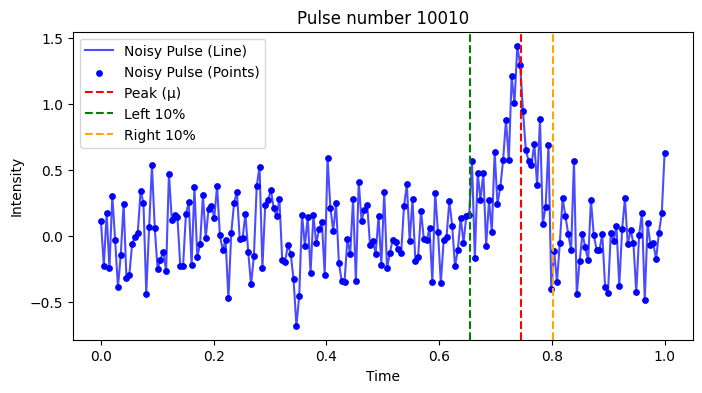

In [3]:
import h5py
import matplotlib.pyplot as plt

# Open the file for reading
with h5py.File("synthetic_pulses_data.h5", "r") as hf:
    pulse_grp = hf["pulses"]
    time_grp = hf["times"]
    mus = hf["mus"][:]    # Load as numpy array
    lefts = hf["lefts"][:]
    rights = hf["rights"][:]

    # Example: Load the nth pulse (e.g., n = 1000)
    n = 10010
    nth_signal = pulse_grp[f"pulse_{n}"][:]  # Convert dataset to numpy array
    nth_x = time_grp[f"time_{n}"][:]
    nth_peak = mus[n]
    nth_left = lefts[n]
    nth_right = rights[n]

print("Pulse index (n):", n)
# print("Noisy signal for pulse n:", nth_signal)
print("Peak (μ):", nth_peak)
print("Left 10% threshold:", nth_left)
print("Right 10% threshold:", nth_right)

# Plot the nth pulse with its thresholds
plt.figure(figsize=(8, 4))
plt.plot(nth_x, nth_signal, label="Noisy Pulse (Line)", color='blue', alpha=0.7)
plt.scatter(nth_x, nth_signal, color='blue', s=15, label="Noisy Pulse (Points)")
plt.axvline(nth_peak, color='red', linestyle='--', label="Peak (μ)")
plt.axvline(nth_left, color='green', linestyle='--', label="Left 10%")
plt.axvline(nth_right, color='orange', linestyle='--', label="Right 10%")
plt.xlabel("Time")
plt.ylabel("Intensity")
plt.title(f"Pulse number {n}")
plt.legend()
plt.show()


In [4]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# MAKE AND TRAIN MODEL
# Architecture:
## Overview

- **Input**: A batch of 1D sequences with shape `(batch, sequence_length)`.
- **CNN Component**: Extracts local features using a convolution layer, followed by a non-linear activation (ReLU) and down-sampling via max pooling.
- **LSTM Component**: Processes the extracted features as a sequence, capturing temporal dependencies.
- **Fully Connected Layer**: Maps the LSTM’s hidden state to a 3-dimensional output for regression.

---

## CNN Component

### 1D Convolution Layer

- **Layer Definition**:  
  ```python
  self.conv1 = nn.Conv1d(in_channels=1, out_channels=cnn_channels, kernel_size=5, padding=2)
  ```
- **Input Transformation**:  
  The input tensor `x` originally has shape `(batch, sequence_length)`. We first add a channel dimension to obtain `(batch, 1, sequence_length)`.

- **Mathematical Operation**:  
  For an input signal \( x \) and a filter \( w \) of size \( k = 5 \) with padding \( p = 2 \), the convolution at position \( i \) is given by:
  $$
  y[i] = \sum_{j=-2}^{2} w[j] \cdot x[i+j]
  $$
  Here, the padding ensures that the output has the same length as the input.

### ReLU Activation

- **Operation**:  
  The ReLU (Rectified Linear Unit) activation function is applied element-wise:
  $$
  \text{ReLU}(z) = \max(0, z)
  $$
  This introduces non-linearity into the model.

### Max Pooling

- **Layer Definition**:  
  ```python
  self.pool = nn.MaxPool1d(kernel_size=2)
  ```
- **Effect on Dimensions**:  
  After pooling, the output sequence length is reduced by approximately a factor of 2 (assuming the sequence length is even), i.e., from \( L \) to $ \frac{L}{2} $.

---

## LSTM Component

### Input Preparation

- **Permutation**:  
  The CNN output has shape `(batch, cnn_channels, sequence_length/2)`. It is permuted to `(batch, sequence_length/2, cnn_channels)` to match the expected input shape for the LSTM, where:
  - **Sequence length**: $ T = \frac{L}{2} $
  - **Feature size**: F = `cnn_channels`

### LSTM Layer

- **Layer Definition**:  
  ```python
  self.lstm = nn.LSTM(input_size=cnn_channels, hidden_size=lstm_hidden_size, num_layers=lstm_layers, batch_first=True)
  ```
- **Operation**:  
  The LSTM processes the sequence data and captures temporal dependencies. For each time step \( t \), the LSTM cell performs the following operations:

  1. **Forget Gate**:
     $$
     f_t = \sigma(W_f x_t + U_f h_{t-1} + b_f)
     $$
  2. **Input Gate**:
     $$
     i_t = \sigma(W_i x_t + U_i h_{t-1} + b_i)
     $$
  3. **Candidate Cell State**:
     $$
     c_t = \tanh(W_c x_t + U_c h_{t-1} + b_c)
     $$
  4. **Cell State Update**:
     $$
     c_t = f_t \odot c_{t-1} + i_t \odot c_t
     $$
  5. **Output Gate and Hidden State**:
     $$
     o_t = \sigma(W_o x_t + U_o h_{t-1} + b_o)
     $$
     $$
     h_t = o_t \odot \tanh(c_t)
     $$
  
  Here, $ \sigma $ is the sigmoid function, and $ \odot $ denotes element-wise multiplication. The LSTM outputs:
  - **Hidden states** for all time steps.
  - **Final hidden state** $ h_n $ (taken from the last LSTM layer) is used for prediction.

---

## Fully Connected Layer

- **Layer Definition**:  
  ```python
  self.fc = nn.Linear(lstm_hidden_size, 3)
  ```
- **Operation**:  
  The last hidden state $h_n[-1] $ from the LSTM is passed through the fully connected layer:
  $$
  y = W_{fc} h + b_{fc}
  $$
  This linear transformation maps the LSTM output to a 3-dimensional output vector.


---

## Training Setup

- **Loss Function**:  
  Mean Squared Error (MSE) loss is used for regression:
  $$
  \text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
  $$
- **Optimizer**:  
  The Adam optimizer is applied with a learning rate of 0.001:
  ```python
  optimizer = optim.Adam(model.parameters(), lr=0.001)
  ```

---

## REFERENCE TIME:
- training time = `24m 18s` on `RTX3050 6GB laptop`



In [ ]:
import h5py
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import json  # For saving the history as JSON

# ---------------------------
# Define a custom Dataset for HDF5 data
# ---------------------------
class PulseDataset(Dataset):
    def __init__(self, h5_filename):
        # Open the file in read mode
        self.h5_file = h5py.File(h5_filename, 'r')
        self.pulses_group = self.h5_file['pulses']
        # Load target arrays (assumed to be homogeneous)
        self.mus = self.h5_file['mus'][:]    # shape: (n_samples,)
        self.lefts = self.h5_file['lefts'][:]
        self.rights = self.h5_file['rights'][:]
        self.n_samples = self.mus.shape[0]

    def __len__(self):
        return self.n_samples

    def __getitem__(self, idx):
        # Each pulse is stored under the key "pulse_{idx}"
        pulse = self.pulses_group[f"pulse_{idx}"][:]
        # Convert the pulse to a torch tensor (1D tensor of fixed length)
        pulse_tensor = torch.tensor(pulse, dtype=torch.float32)
        # Build the target tensor: [mu, left_threshold, right_threshold]
        target = torch.tensor([self.mus[idx], self.lefts[idx], self.rights[idx]], dtype=torch.float32)
        return pulse_tensor, target


# Create datasets and DataLoaders for training and testing data
train_dataset = PulseDataset("synthetic_pulses_data.h5")
test_dataset  = PulseDataset("synthetic_pulses_data_test.h5")

# Using default collate since pulses are of fixed length
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

# ---------------------------
# Define the Hybrid CNN-LSTM Model
# ---------------------------
class HybridCNNLSTM(nn.Module):
    def __init__(self, cnn_channels=32, lstm_hidden_size=64, lstm_layers=1):
        super(HybridCNNLSTM, self).__init__()
        # 1D convolution: expects input of shape (batch, 1, sequence_length)
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=cnn_channels, kernel_size=5, padding=2)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)
        # LSTM: input size = cnn_channels (features from the CNN layer)
        self.lstm = nn.LSTM(input_size=cnn_channels, hidden_size=lstm_hidden_size,
                            num_layers=lstm_layers, batch_first=True)
        # Fully connected layer mapping from LSTM hidden state to 3 regression outputs
        self.fc = nn.Linear(lstm_hidden_size, 3)

    def forward(self, x):
        # x shape: (batch, sequence_length)
        # Add a channel dimension: becomes (batch, 1, sequence_length)
        x = x.unsqueeze(1)
        # Apply convolution, activation, and pooling:
        x = self.conv1(x)      # -> (batch, cnn_channels, sequence_length)
        x = self.relu(x)
        x = self.pool(x)       # -> (batch, cnn_channels, sequence_length/2)
        # Permute to (batch, sequence_length/2, cnn_channels) for LSTM input
        x = x.permute(0, 2, 1)
        # LSTM processing
        out, (h_n, _) = self.lstm(x)
        # Use the last layer's hidden state for prediction
        x = self.fc(h_n[-1])
        return x

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate model, loss function, and optimizer
model = HybridCNNLSTM().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ---------------------------
# Setup Loss History and Prediction Storage for Specific Pulses
# ---------------------------
train_loss_history = []    # List to record average train loss per epoch
test_loss_history  = []    # List to record average test loss per epoch

# For training set: record pulse 1000 and 2000 (their predictions and actual targets)
predictions_train_1000 = []
actuals_train_1000 = []
predictions_train_2000 = []
actuals_train_2000 = []

# For test set: record pulse 1000 and 2000
predictions_test_1000 = []
actuals_test_1000 = []
predictions_test_2000 = []
actuals_test_2000 = []

num_epochs = 100  # Total number of training epochs

# ---------------------------
# Training Loop with Test Evaluation
# ---------------------------
for epoch in range(num_epochs):
    print(f"Starting epoch {epoch+1}", flush=True)

    # --- Training Phase ---
    model.train()  # Ensure the model is in training mode
    epoch_train_loss = 0.0
    for batch_signals, batch_targets in train_loader:
        batch_signals, batch_targets = batch_signals.to(device), batch_targets.to(device)

        optimizer.zero_grad()
        outputs = model(batch_signals)
        loss = criterion(outputs, batch_targets)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()

    avg_train_loss = epoch_train_loss / len(train_loader)
    train_loss_history.append(avg_train_loss)
    print(f"Epoch {epoch+1}/{num_epochs} Train Loss: {avg_train_loss:.9f}", flush=True)

    # --- Testing Phase (evaluation on test dataset, without training) ---
    model.eval()  # Switch to evaluation mode
    epoch_test_loss = 0.0
    with torch.inference_mode():
        for batch_signals, batch_targets in test_loader:
            batch_signals, batch_targets = batch_signals.to(device), batch_targets.to(device)
            outputs = model(batch_signals)
            loss = criterion(outputs, batch_targets)
            epoch_test_loss += loss.item()
    avg_test_loss = epoch_test_loss / len(test_loader)
    test_loss_history.append(avg_test_loss)
    print(f"Epoch {epoch+1}/{num_epochs} Test Loss: {avg_test_loss:.9f}", flush=True)

    # --- Evaluate and record predictions for specific pulses from both train and test sets ---
    with torch.inference_mode():
        # Check if the indices exist in the training set
        if len(train_dataset) > 2000:
            # For training pulse 1000:
            pulse_1000, target_1000 = train_dataset[1000]
            pulse_1000 = pulse_1000.unsqueeze(0).to(device)  # Add batch dimension
            pred_1000 = model(pulse_1000)
            predictions_train_1000.append(pred_1000.cpu().numpy())
            actuals_train_1000.append(target_1000.cpu().numpy())

            # For training pulse 2000:
            pulse_2000, target_2000 = train_dataset[2000]
            pulse_2000 = pulse_2000.unsqueeze(0).to(device)
            pred_2000 = model(pulse_2000)
            predictions_train_2000.append(pred_2000.cpu().numpy())
            actuals_train_2000.append(target_2000.cpu().numpy())

        # Check if the indices exist in the test set
        if len(test_dataset) > 2000:
            # For test pulse 1000:
            pulse_1000_test, target_1000_test = test_dataset[1000]
            pulse_1000_test = pulse_1000_test.unsqueeze(0).to(device)
            pred_1000_test = model(pulse_1000_test)
            predictions_test_1000.append(pred_1000_test.cpu().numpy())
            actuals_test_1000.append(target_1000_test.cpu().numpy())

            # For test pulse 2000:
            pulse_2000_test, target_2000_test = test_dataset[2000]
            pulse_2000_test = pulse_2000_test.unsqueeze(0).to(device)
            pred_2000_test = model(pulse_2000_test)
            predictions_test_2000.append(pred_2000_test.cpu().numpy())
            actuals_test_2000.append(target_2000_test.cpu().numpy())

# Save the final model
torch.save(model.state_dict(), "pulse_detection_model_final_2.pth")
print("Training complete. Model saved as 'pulse_detection_model_final_2.pth'.")

# ---------------------------
# Save Training History and Predictions to a JSON file
# ---------------------------
history_dict = {
    "train_loss_history": train_loss_history,
    "test_loss_history": test_loss_history,
    "predictions_train_1000": [pred.tolist() for pred in predictions_train_1000],
    "actuals_train_1000": [act.tolist() for act in actuals_train_1000],
    "predictions_train_2000": [pred.tolist() for pred in predictions_train_2000],
    "actuals_train_2000": [act.tolist() for act in actuals_train_2000],
    "predictions_test_1000": [pred.tolist() for pred in predictions_test_1000],
    "actuals_test_1000": [act.tolist() for act in actuals_test_1000],
    "predictions_test_2000": [pred.tolist() for pred in predictions_test_2000],
    "actuals_test_2000": [act.tolist() for act in actuals_test_2000],
}

with open("training_history.json", "w") as f:
    json.dump(history_dict, f, indent=4)

print("Training history and predictions saved to 'training_history.json'.")


Starting epoch 1
Epoch 1/100 Train Loss: 0.029682847
Epoch 1/100 Test Loss: 0.001227332
Starting epoch 2
Epoch 2/100 Train Loss: 0.001227523
Epoch 2/100 Test Loss: 0.000770838
Starting epoch 3
Epoch 3/100 Train Loss: 0.000626989
Epoch 3/100 Test Loss: 0.000612079
Starting epoch 4
Epoch 4/100 Train Loss: 0.001092168
Epoch 4/100 Test Loss: 0.000973888
Starting epoch 5
Epoch 5/100 Train Loss: 0.000724640
Epoch 5/100 Test Loss: 0.000890696
Starting epoch 6
Epoch 6/100 Train Loss: 0.000532634
Epoch 6/100 Test Loss: 0.000480608
Starting epoch 7
Epoch 7/100 Train Loss: 0.000518919
Epoch 7/100 Test Loss: 0.000343433
Starting epoch 8
Epoch 8/100 Train Loss: 0.000346682
Epoch 8/100 Test Loss: 0.000211814
Starting epoch 9
Epoch 9/100 Train Loss: 0.000274600
Epoch 9/100 Test Loss: 0.000260043
Starting epoch 10
Epoch 10/100 Train Loss: 0.000238073
Epoch 10/100 Test Loss: 0.000274929
Starting epoch 11
Epoch 11/100 Train Loss: 0.000251168
Epoch 11/100 Test Loss: 0.000292592
Starting epoch 12
Epoch 12

# TRIAL WITH GPU
### Reference values:

- `619 µs ± 11.5 µs per loop` (mean ± std. dev. of 7 runs, 1000 loops each) ( `T4 colab` )
- `3.08 ms ± 169 μs per loop` (mean ± std. dev. of 7 runs, 100 loops each) (`local RTX3050 6gb laptop`)

- load model if not loaded with

In [15]:

# To load the model later:
# 1. Initialize the model instance with the same architecture
model = HybridCNNLSTM()
model = model.to(device)
# 2. Load the saved state_dict into the model
model.load_state_dict(torch.load("hybrid_cnn_lstm_model_final_1.pth"))
model.eval()  # Set the model to evaluation mode
print("Model loaded successfully.")


Model loaded successfully.


C:\Users\bijay\AppData\Local\Temp\ipykernel_23032\2264321294.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("hybrid_cnn_lstm_model_fina

3.08 ms ± 169 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Original Targets:
Peak (μ): 0.30222816977256917
Left 10% threshold: 0.2539789520212513
Right 10% threshold: 0.33101207766640073

Model Prediction:
Predicted Peak: 0.3077761
Predicted Left 10%: 0.24402879
Predicted Right 10%: 0.35137707


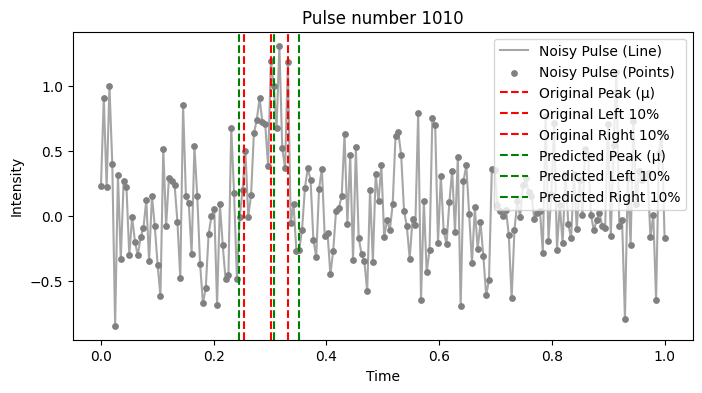

In [16]:
import h5py
import torch
import matplotlib.pyplot as plt
import timeit
# Open the file for reading
with h5py.File("synthetic_pulses_data_test.h5", "r") as hf:
    pulse_grp = hf["pulses"]
    time_grp = hf["times"]
    mus = hf["mus"][:]    # Load as numpy array
    lefts = hf["lefts"][:]
    rights = hf["rights"][:]

    # Example: Load the nth pulse (e.g., n = 1000)
    n = 1010
    nth_signal = pulse_grp[f"pulse_{n}"][:]  # Convert dataset to numpy array
    nth_time = time_grp[f"time_{n}"][:]
    nth_peak = mus[n]
    nth_left = lefts[n]
    nth_right = rights[n]


# Convert the sample signal to a torch tensor and run through the model
model.eval()
with torch.no_grad():
    sample_tensor = torch.tensor(nth_signal, dtype=torch.float32).unsqueeze(0)  # add batch dimension
    %timeit model(sample_tensor.to(device)).squeeze().cpu().numpy()
    pred = model(sample_tensor.to(device)).squeeze().cpu().numpy()

# Print original and predicted values
print("Original Targets:")
print("Peak (μ):", nth_peak)
print("Left 10% threshold:", nth_left)
print("Right 10% threshold:", nth_right)
print("\nModel Prediction:")
print("Predicted Peak:", pred[0])
print("Predicted Left 10%:", pred[1])
print("Predicted Right 10%:", pred[2])

# Plotting the nth pulse with original thresholds
plt.figure(figsize=(8, 4))
plt.plot(nth_time, nth_signal, label="Noisy Pulse (Line)", color='grey', alpha=0.7)
plt.scatter(nth_time, nth_signal, color='grey', s=15, label="Noisy Pulse (Points)")
plt.axvline(nth_peak, color='red', linestyle='--', label="Original Peak (μ)")
plt.axvline(nth_left, color='red', linestyle='--', label="Original Left 10%")
plt.axvline(nth_right, color='red', linestyle='--', label="Original Right 10%")
plt.axvline(pred[0], color='green', linestyle='--', label="Predicted Peak (μ)")
plt.axvline(pred[1], color='green', linestyle='--', label="Predicted Left 10%")
plt.axvline(pred[2], color='green', linestyle='--', label="Predicted Right 10%")

plt.xlabel("Time")
plt.ylabel("Intensity")
plt.title(f"Pulse number {n}")
plt.legend()
plt.show()


# TRIAL WITH CPU
### Reference data:
- `3.6 ms ± 82.6 μs per loop` (mean ± std. dev. of 7 runs, 100 loops each)

In [18]:
import h5py
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence

# ---------------------------
# Define a custom Dataset for HDF5 data
# ---------------------------
class PulseDataset(Dataset):
    def __init__(self, h5_filename):
        # Open the file in read mode
        self.h5_file = h5py.File(h5_filename, 'r')
        self.pulses_group = self.h5_file['pulses']
        # Load target arrays (assumed to be homogeneous)
        self.mus = self.h5_file['mus'][:]    # shape: (n_samples,)
        self.lefts = self.h5_file['lefts'][:]
        self.rights = self.h5_file['rights'][:]
        self.n_samples = self.mus.shape[0]

    def __len__(self):
        return self.n_samples

    def __getitem__(self, idx):
        # Each pulse is stored under the key "pulse_{idx}"
        pulse = self.pulses_group[f"pulse_{idx}"][:]
        # Convert the pulse to a torch tensor (1D tensor of fixed length)
        pulse_tensor = torch.tensor(pulse, dtype=torch.float32)
        # Build the target tensor: [mu, left_threshold, right_threshold]
        target = torch.tensor([self.mus[idx], self.lefts[idx], self.rights[idx]], dtype=torch.float32)
        return pulse_tensor, target


# Create the dataset and DataLoader
dataset = PulseDataset("synthetic_pulses_data.h5")
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# ---------------------------
# Define the Hybrid CNN-LSTM Model
# ---------------------------
class HybridCNNLSTM(nn.Module):
    def __init__(self, cnn_channels=32, lstm_hidden_size=64, lstm_layers=1):
        super(HybridCNNLSTM, self).__init__()
        # 1D convolution: expects input of shape (batch, 1, sequence_length)
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=cnn_channels, kernel_size=5, padding=2)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)
        # LSTM: input size = cnn_channels (features from the CNN layer)
        self.lstm = nn.LSTM(input_size=cnn_channels, hidden_size=lstm_hidden_size,
                            num_layers=lstm_layers, batch_first=True)
        # Fully connected layer mapping from LSTM hidden state to 3 regression outputs
        self.fc = nn.Linear(lstm_hidden_size, 3)

    def forward(self, x):
        # x shape: (batch, sequence_length)
        # Add a channel dimension: becomes (batch, 1, sequence_length)
        x = x.unsqueeze(1)
        # Apply convolution, activation, and pooling:
        x = self.conv1(x)      # -> (batch, cnn_channels, sequence_length)
        x = self.relu(x)
        x = self.pool(x)       # -> (batch, cnn_channels, sequence_length/2)
        # Permute to (batch, sequence_length/2, cnn_channels) for LSTM input
        x = x.permute(0, 2, 1)
        # LSTM processing
        out, (h_n, _) = self.lstm(x)
        # Use the last layer's hidden state for prediction
        x = self.fc(h_n[-1])
        return x


In [43]:

# To load the model later:
# 1. Initialize the model instance with the same architecture
model = HybridCNNLSTM()
# 2. Load the saved state_dict into the model
model.load_state_dict(torch.load("pulse_detection_model_final_2.pth", map_location=torch.device('cpu')))
model.eval()  # Set the model to evaluation mode
print("Model loaded successfully.")


Model loaded successfully.


C:\Users\bijay\AppData\Local\Temp\ipykernel_23032\1354752151.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("pulse_detection_model_fina

3.48 ms ± 84 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Original Targets:
Peak (μ): 0.7959898707788462
Left 10% threshold: 0.7278428238091137
Right 10% threshold: 0.8435561234832507

Model Prediction:
Predicted Peak: 0.791826
Predicted Left 10%: 0.72988665
Predicted Right 10%: 0.8471111
0.006906270980834961


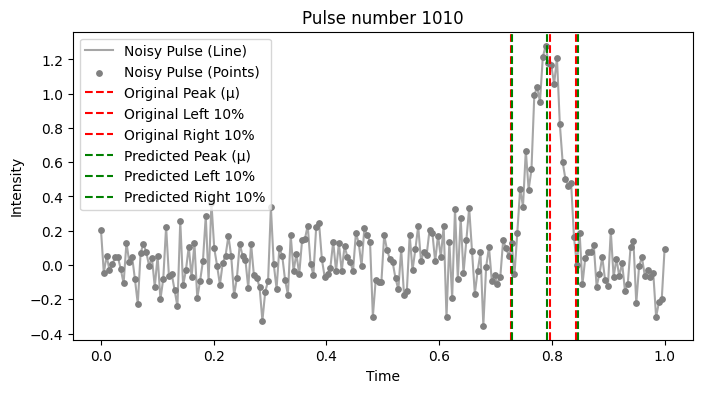

In [44]:
import time

np.random.seed(np.random.randint(0,1000))
nth_time, nth_signal, nth_peak, nth_left, nth_right = generate_pulse(200, 1, 0.15)
end_fit = 0
# Convert the sample signal to a torch tensor and run through the model
model.eval()
with torch.inference_mode():
    sample_tensor = torch.tensor(nth_signal, dtype=torch.float32).unsqueeze(0)  # add batch dimension
    %timeit pred = model(sample_tensor).squeeze().numpy()
    start_fit = time.time()
    pred = model(sample_tensor).squeeze().numpy()
    end_fit = time.time() - start_fit

print("Original Targets:")
print("Peak (μ):", nth_peak)
print("Left 10% threshold:", nth_left)
print("Right 10% threshold:", nth_right)
print("\nModel Prediction:")
print("Predicted Peak:", pred[0])
print("Predicted Left 10%:", pred[1])
print("Predicted Right 10%:", pred[2])

print(end_fit)

# Plotting the nth pulse with original thresholds
plt.figure(figsize=(8, 4))
plt.plot(nth_time, nth_signal, label="Noisy Pulse (Line)", color='grey', alpha=0.7)
plt.scatter(nth_time, nth_signal, color='grey', s=15, label="Noisy Pulse (Points)")
plt.axvline(nth_peak, color='red', linestyle='--', label="Original Peak (μ)")
plt.axvline(nth_left, color='red', linestyle='--', label="Original Left 10%")
plt.axvline(nth_right, color='red', linestyle='--', label="Original Right 10%")
plt.axvline(pred[0], color='green', linestyle='--', label="Predicted Peak (μ)")
plt.axvline(pred[1], color='green', linestyle='--', label="Predicted Left 10%")
plt.axvline(pred[2], color='green', linestyle='--', label="Predicted Right 10%")

plt.xlabel("Time")
plt.ylabel("Intensity")
plt.title(f"Pulse number {n}")
plt.legend()
plt.show()


# COMPARISION WITH GAUSSIAN REGRESSION (CPU)
### Reference data:
- GPR Fit Time: `487 ms ± 98 ms per loop` (mean ± std. dev. of 7 runs, 1 loop each)
- GPR Prediction Time: `34.9 ms ± 827 μs per loop` (mean ± std. dev. of 7 runs, 10 loops each)


487 ms ± 98 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
34.9 ms ± 827 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
GPR Fit Time: 3.9677 seconds
GPR Prediction Time: 2.8425 seconds

True Values:
Peak: 0.5004, Left Threshold: 0.4360, Right Threshold: 0.5347

Predicted Values:
Peak: 0.3508, Left Threshold: 0.2779, Right Threshold: 0.4329


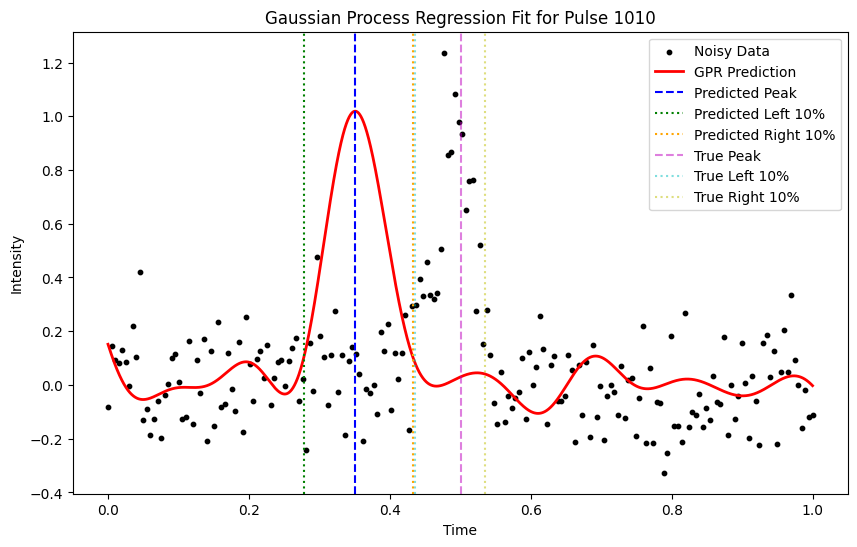

In [27]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
import time

# # Load the dataset
# n = 1000  # Example pulse index
# with h5py.File("synthetic_pulses_data.h5", "r") as hf:
#     pulse_grp = hf["pulses"]
#     time_grp = hf["times"]
#     mus = hf["mus"][:]
#     lefts = hf["lefts"][:]
#     rights = hf["rights"][:]

#     nth_signal = pulse_grp[f"pulse_{n}"][:]
#     nth_x = time_grp[f"time_{n}"][:]
#     nth_peak_true = mus[n]
#     nth_left_true = lefts[n]
#     nth_right_true = rights[n]

nth_x = nth_time
nth_peak_true = nth_peak
nth_left_true = nth_left
nth_right_true = nth_right
# Prepare data for GPR
X = nth_x.reshape(-1, 1)
y = nth_signal.ravel()

# Define the kernel with initial parameters and bounds
kernel = RBF(length_scale=0.05) + WhiteKernel(noise_level=0.1)
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Time the fitting process
start_fit = time.time()
%timeit gpr.fit(X, y)
fit_time = time.time() - start_fit

# Generate a dense time grid for prediction
x_dense = np.linspace(nth_x.min(), nth_x.max(), 10000).reshape(-1, 1)

# Time the prediction
start_pred = time.time()
%timeit y_mean, y_std = gpr.predict(x_dense, return_std=True)
pred_time = time.time() - start_pred

# Find peak coordinates
peak_idx = np.argmax(y_mean)
peak_amp = y_mean[peak_idx]
peak_time = x_dense[peak_idx, 0]
threshold = 0.1 * peak_amp

# Function to find threshold crossing with interpolation
def find_threshold(x_values, y_values, threshold):
    # Check if all values are above threshold
    if np.all(y_values > threshold):
        return None
    # Find where the values cross the threshold
    below = y_values <= threshold
    # Get the indices where the transition happens
    transition = np.where(below[:-1] != below[1:])[0]
    if len(transition) == 0:
        return None
    # Take the first transition from above to below
    for idx in transition:
        if not below[idx] and below[idx+1]:
            left_idx = idx
            right_idx = idx + 1
            x_left = x_values[left_idx]
            y_left = y_values[left_idx]
            x_right = x_values[right_idx]
            y_right = y_values[right_idx]
            # Linear interpolation
            alpha = (threshold - y_right) / (y_left - y_right)
            x_thresh = x_right + alpha * (x_left - x_right)
            return x_thresh
    return None
# Find left threshold (to the left of the peak)
left_mask = x_dense < peak_time
x_left = x_dense[left_mask].flatten()
y_left = y_mean[left_mask.flatten()]  # Fix here
# Reverse to start from peak and go left
x_left_rev = x_left[::-1]
y_left_rev = y_left[::-1]
left_threshold = find_threshold(x_left_rev, y_left_rev, threshold)

# Find right threshold (to the right of the peak)
right_mask = x_dense > peak_time
x_right = x_dense[right_mask].flatten()
y_right = y_mean[right_mask.flatten()]  # Fix here
right_threshold = find_threshold(x_right, y_right, threshold)


# Output results
print(f"GPR Fit Time: {fit_time:.4f} seconds")
print(f"GPR Prediction Time: {pred_time:.4f} seconds")
print("\nTrue Values:")
print(f"Peak: {nth_peak_true:.4f}, Left Threshold: {nth_left_true:.4f}, Right Threshold: {nth_right_true:.4f}")
print("\nPredicted Values:")
print(f"Peak: {peak_time:.4f}, Left Threshold: {left_threshold:.4f}, Right Threshold: {right_threshold:.4f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='k', s=10, label="Noisy Data")
plt.plot(x_dense, y_mean, 'r-', lw=2, label="GPR Prediction")
plt.axvline(peak_time, color='b', linestyle='--', label="Predicted Peak")
plt.axvline(left_threshold, color='g', linestyle=':', label="Predicted Left 10%")
plt.axvline(right_threshold, color='orange', linestyle=':', label="Predicted Right 10%")
plt.axvline(nth_peak_true, color='m', linestyle='--', alpha=0.5, label="True Peak")
plt.axvline(nth_left_true, color='c', linestyle=':', alpha=0.5, label="True Left 10%")
plt.axvline(nth_right_true, color='y', linestyle=':', alpha=0.5, label="True Right 10%")
plt.xlabel("Time")
plt.ylabel("Intensity")
plt.title(f"Gaussian Process Regression Fit for Pulse {n}")
plt.legend()
plt.show()



# Visualizations:

In [31]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Load the training history
with open("training_history.json", "r") as f:
    history = json.load(f)

# Function to prepare data for a specific pulse
def prepare_data(pulse_number):
    actual_train = np.array(history[f"actuals_train_{pulse_number}"][0])
    # Remove extra dimension so predictions become (num_epochs, 3)
    pred_train = np.squeeze(np.array(history[f"predictions_train_{pulse_number}"]), axis=1)
    actual_test = np.array(history[f"actuals_test_{pulse_number}"][0])
    pred_test = np.squeeze(np.array(history[f"predictions_test_{pulse_number}"]), axis=1)
    return actual_train, pred_train, actual_test, pred_test

# Prepare data for pulses 1000 and 2000
pulse_1000_data = prepare_data(1000)
pulse_2000_data = prepare_data(2000)

# Extract loss histories
train_loss = history["train_loss_history"]
test_loss = history["test_loss_history"]

# Function to create animation for a specific pulse
def create_animation(pulse_number, pulse_data, output_filename):
    actual_train, pred_train, actual_test, pred_test = pulse_data
    num_epochs = len(train_loss)
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Training Progress for Pulse {pulse_number}', fontsize=16)
    
    # Training Loss (log scale)
    ax1.set_title("Training Loss (log scale)")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Loss")
    ax1.grid(True)
    line_train_loss, = ax1.semilogy([], [], lw=2, color='tab:blue')
    
    # Train Predictions
    ax2.set_title(f"Train Predictions (Pulse {pulse_number})")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Threshold Value")
    ax2.grid(True)
    line_train_mu, = ax2.plot([], [], 'b-', label='Predicted μ')
    line_train_left, = ax2.plot([], [], 'g-', label='Predicted Left')
    line_train_right, = ax2.plot([], [], 'r-', label='Predicted Right')
    ax2.axhline(actual_train[0], color='b', ls='--', label='Actual μ')
    ax2.axhline(actual_train[1], color='g', ls='--', label='Actual Left')
    ax2.axhline(actual_train[2], color='r', ls='--', label='Actual Right')
    ax2.legend(loc='upper right', fontsize='small')
    
    # Test Loss (log scale)
    ax3.set_title("Test Loss (log scale)")
    ax3.set_xlabel("Epoch")
    ax3.set_ylabel("Loss")
    ax3.grid(True)
    line_test_loss, = ax3.semilogy([], [], lw=2, color='tab:orange')
    
    # Test Predictions
    ax4.set_title(f"Test Predictions (Pulse {pulse_number})")
    ax4.set_xlabel("Epoch")
    ax4.set_ylabel("Threshold Value")
    ax4.grid(True)
    line_test_mu, = ax4.plot([], [], 'b-', label='Predicted μ')
    line_test_left, = ax4.plot([], [], 'g-', label='Predicted Left')
    line_test_right, = ax4.plot([], [], 'r-', label='Predicted Right')
    ax4.axhline(actual_test[0], color='b', ls='--', label='Actual μ')
    ax4.axhline(actual_test[1], color='g', ls='--', label='Actual Left')
    ax4.axhline(actual_test[2], color='r', ls='--', label='Actual Right')
    ax4.legend(loc='upper right', fontsize='small')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    # Initialization function
    def init():
        line_train_loss.set_data([], [])
        line_train_mu.set_data([], [])
        line_train_left.set_data([], [])
        line_train_right.set_data([], [])
        line_test_loss.set_data([], [])
        line_test_mu.set_data([], [])
        line_test_left.set_data([], [])
        line_test_right.set_data([], [])
        return (line_train_loss, line_train_mu, line_train_left, line_train_right,
                line_test_loss, line_test_mu, line_test_left, line_test_right)
    
    # Update function for each frame
    def update(epoch):
        x = np.arange(epoch+1)
        # Update training loss
        line_train_loss.set_data(x, train_loss[:epoch+1])
        ax1.relim()
        ax1.autoscale_view()
        
        # Update train predictions
        line_train_mu.set_data(x, pred_train[:epoch+1, 0])
        line_train_left.set_data(x, pred_train[:epoch+1, 1])
        line_train_right.set_data(x, pred_train[:epoch+1, 2])
        ax2.relim()
        ax2.autoscale_view()
        
        # Update test loss
        line_test_loss.set_data(x, test_loss[:epoch+1])
        ax3.relim()
        ax3.autoscale_view()
        
        # Update test predictions
        line_test_mu.set_data(x, pred_test[:epoch+1, 0])
        line_test_left.set_data(x, pred_test[:epoch+1, 1])
        line_test_right.set_data(x, pred_test[:epoch+1, 2])
        ax4.relim()
        ax4.autoscale_view()
        
        fig.suptitle(f'Epoch {epoch + 1}', fontsize=16)
        return (line_train_loss, line_train_mu, line_train_left, line_train_right,
                line_test_loss, line_test_mu, line_test_left, line_test_right)
    
    # Create the animation
    ani = animation.FuncAnimation(fig, update, frames=num_epochs, init_func=init, blit=True)
    
    # Save as GIF
    ani.save(output_filename, writer='pillow', fps=10, dpi=100)
    plt.close()
    print(f"Saved {output_filename}")

# Create and save animations for both pulses
create_animation(1000, pulse_1000_data, "training_animation_1000.gif")
create_animation(2000, pulse_2000_data, "training_animation_2000.gif")


Saved training_animation_1000.gif
Saved training_animation_2000.gif


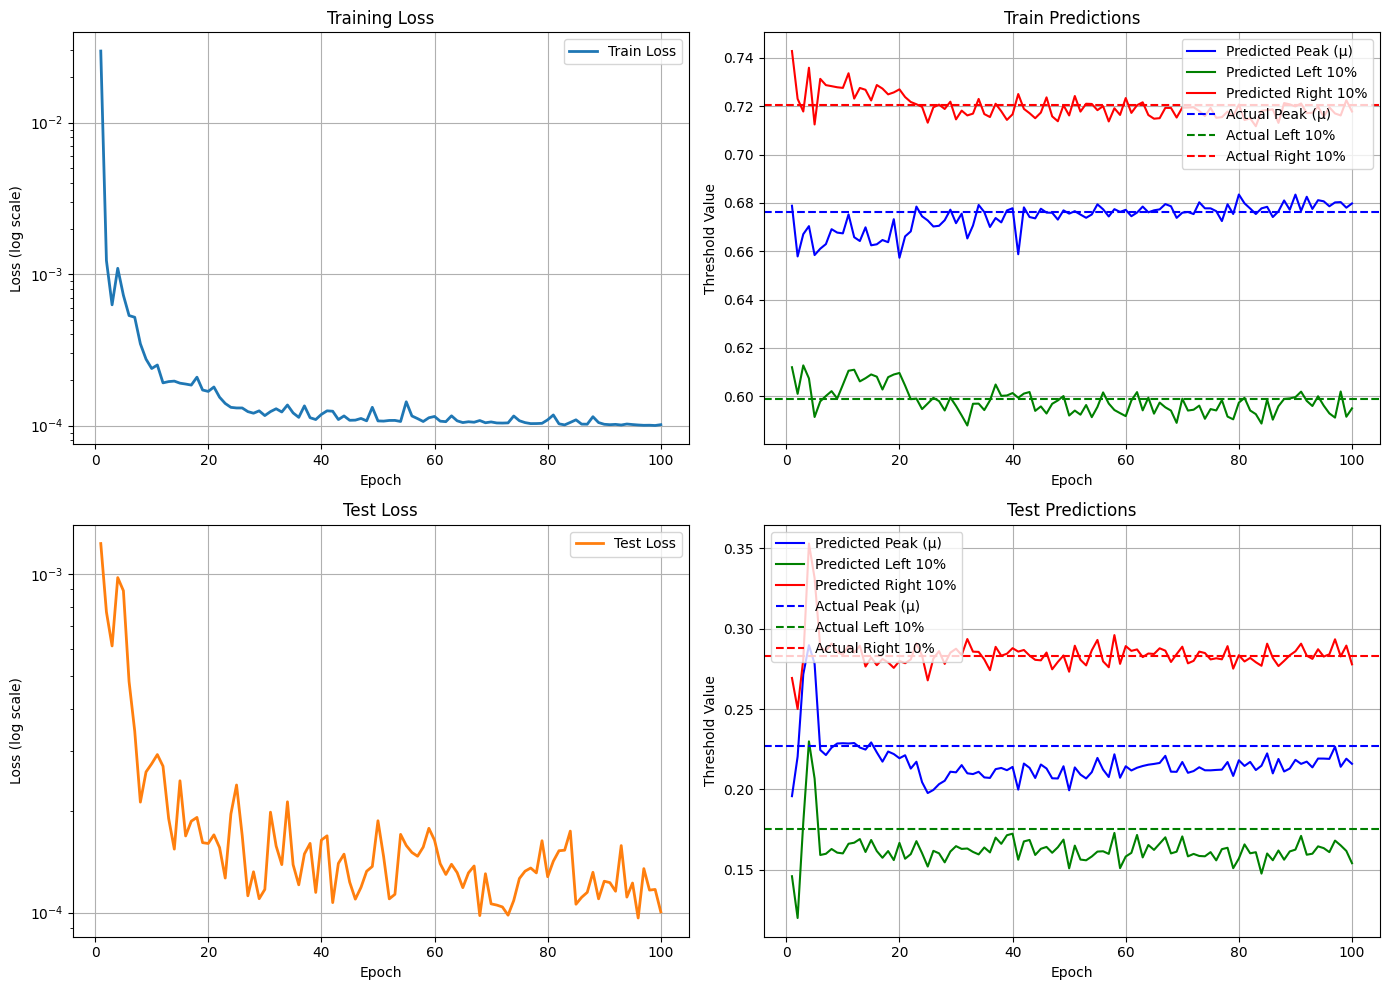

TRAINING DATA:
Pulse index (n): 1000
Actual Peak (μ): 0.6762750043878725
Actual Left 10% threshold: 0.5987246857378838
Actual Right 10% threshold: 0.7204484776551425


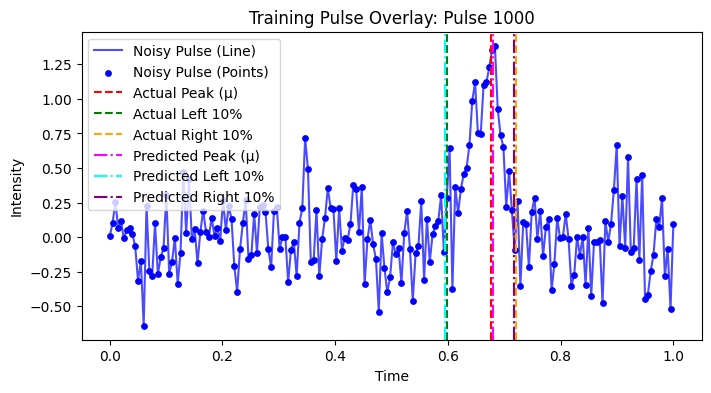

TEST DATA:
Pulse index (n): 1000
Actual Peak (μ): 0.22683187569347033
Actual Left 10% threshold: 0.1754641245939691
Actual Right 10% threshold: 0.28295542561956927


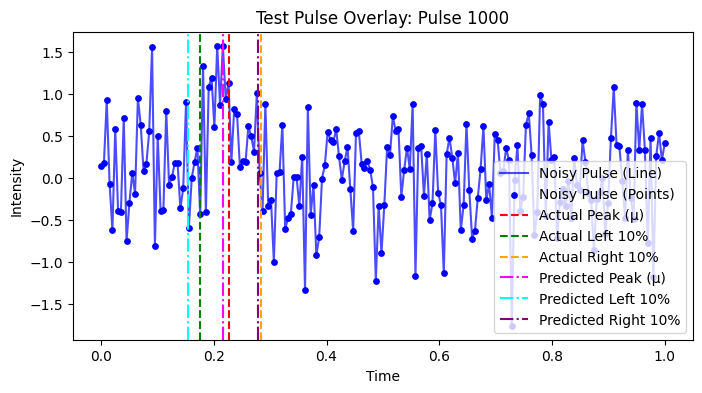

In [34]:
import json
import numpy as np
import matplotlib.pyplot as plt
import h5py

# ======================================================
# PART 1: Loss Graphs & Training/Test Predictions vs Epochs
# ======================================================

# Load the training history JSON file
with open("training_history.json", "r") as f:
    history = json.load(f)

def prepare_data(pulse_number):
    """
    Extracts the actual target values and prediction arrays for a given pulse.
    Assumes the JSON keys are in the form:
       "actuals_train_{pulse_number}"
       "predictions_train_{pulse_number}"
       "actuals_test_{pulse_number}"
       "predictions_test_{pulse_number}"
    If the predictions are stored as arrays of shape (epochs, 1, 3),
    they are squeezed to shape (epochs, 3).
    """
    # Actual targets: stored with an extra [0] index in JSON
    actual_train = np.array(history[f"actuals_train_{pulse_number}"][0])
    actual_test  = np.array(history[f"actuals_test_{pulse_number}"][0])
    
    # Predictions: might be of shape (epochs, 1, 3)
    pred_train_raw = np.array(history[f"predictions_train_{pulse_number}"])
    pred_test_raw  = np.array(history[f"predictions_test_{pulse_number}"])
    
    if pred_train_raw.ndim == 3 and pred_train_raw.shape[1] == 1:
        pred_train = np.squeeze(pred_train_raw, axis=1)
    else:
        pred_train = pred_train_raw

    if pred_test_raw.ndim == 3 and pred_test_raw.shape[1] == 1:
        pred_test = np.squeeze(pred_test_raw, axis=1)
    else:
        pred_test = pred_test_raw

    return actual_train, pred_train, actual_test, pred_test

# Choose a pulse number for which predictions were stored in JSON
# (Make sure the keys "actuals_train_<n>", etc. exist in your JSON file)
pulse_number = 1000  
actual_train, pred_train, actual_test, pred_test = prepare_data(pulse_number)

# Loss histories (assumed to be lists over epochs)
train_loss = np.array(history["train_loss_history"])
test_loss  = np.array(history["test_loss_history"])
num_epochs = len(train_loss)
epochs = np.arange(1, num_epochs + 1)

# --- Loss Graphs ---
plt.figure(figsize=(14, 10))

# Subplot 1: Training Loss (log scale)
plt.subplot(2, 2, 1)
plt.semilogy(epochs, train_loss, lw=2, color='tab:blue', label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (log scale)")
plt.title("Training Loss")
plt.grid(True)
plt.legend()

# Subplot 2: Train Predictions over Epochs
plt.subplot(2, 2, 2)
plt.plot(epochs, pred_train[:, 0], 'b-', label="Predicted Peak (μ)")
plt.plot(epochs, pred_train[:, 1], 'g-', label="Predicted Left 10%")
plt.plot(epochs, pred_train[:, 2], 'r-', label="Predicted Right 10%")
plt.axhline(actual_train[0], color='b', linestyle='--', label="Actual Peak (μ)")
plt.axhline(actual_train[1], color='g', linestyle='--', label="Actual Left 10%")
plt.axhline(actual_train[2], color='r', linestyle='--', label="Actual Right 10%")
plt.xlabel("Epoch")
plt.ylabel("Threshold Value")
plt.title("Train Predictions")
plt.grid(True)
plt.legend()

# Subplot 3: Test Loss (log scale)
plt.subplot(2, 2, 3)
plt.semilogy(epochs, test_loss, lw=2, color='tab:orange', label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (log scale)")
plt.title("Test Loss")
plt.grid(True)
plt.legend()

# Subplot 4: Test Predictions over Epochs
plt.subplot(2, 2, 4)
plt.plot(epochs, pred_test[:, 0], 'b-', label="Predicted Peak (μ)")
plt.plot(epochs, pred_test[:, 1], 'g-', label="Predicted Left 10%")
plt.plot(epochs, pred_test[:, 2], 'r-', label="Predicted Right 10%")
plt.axhline(actual_test[0], color='b', linestyle='--', label="Actual Peak (μ)")
plt.axhline(actual_test[1], color='g', linestyle='--', label="Actual Left 10%")
plt.axhline(actual_test[2], color='r', linestyle='--', label="Actual Right 10%")
plt.xlabel("Epoch")
plt.ylabel("Threshold Value")
plt.title("Test Predictions")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Extract final predictions (from the last epoch) for overlaying on the pulse signals
final_pred_train = pred_train[-1, :]  # [pred_peak, pred_left, pred_right]
final_pred_test  = pred_test[-1, :]

# ======================================================
# PART 2: Overlay Predictions on Signal Data from h5 Files
# ======================================================

# --- Training Data Overlay ---
with h5py.File("synthetic_pulses_data.h5", "r") as hf:
    pulse_grp = hf["pulses"]
    time_grp = hf["times"]
    mus = hf["mus"][:]    # True thresholds stored as numpy arrays
    lefts = hf["lefts"][:]
    rights = hf["rights"][:]
    
    # Load the pulse data for the chosen index (pulse_number)
    nth_signal = pulse_grp[f"pulse_{pulse_number}"][:]  
    nth_x = time_grp[f"time_{pulse_number}"][:]
    nth_peak = mus[pulse_number]
    nth_left = lefts[pulse_number]
    nth_right = rights[pulse_number]

print("TRAINING DATA:")
print("Pulse index (n):", pulse_number)
print("Actual Peak (μ):", nth_peak)
print("Actual Left 10% threshold:", nth_left)
print("Actual Right 10% threshold:", nth_right)

plt.figure(figsize=(8, 4))
plt.plot(nth_x, nth_signal, label="Noisy Pulse (Line)", color='blue', alpha=0.7)
plt.scatter(nth_x, nth_signal, color='blue', s=15, label="Noisy Pulse (Points)")

# Plot actual thresholds from h5 file (solid dashed lines)
plt.axvline(nth_peak, color='red', linestyle='--', label="Actual Peak (μ)")
plt.axvline(nth_left, color='green', linestyle='--', label="Actual Left 10%")
plt.axvline(nth_right, color='orange', linestyle='--', label="Actual Right 10%")

# Overlay predictions (final epoch from JSON) with a different linestyle
plt.axvline(final_pred_train[0], color='magenta', linestyle='-.', label="Predicted Peak (μ)")
plt.axvline(final_pred_train[1], color='cyan', linestyle='-.', label="Predicted Left 10%")
plt.axvline(final_pred_train[2], color='purple', linestyle='-.', label="Predicted Right 10%")

plt.xlabel("Time")
plt.ylabel("Intensity")
plt.title(f"Training Pulse Overlay: Pulse {pulse_number}")
plt.legend()
plt.show()


# --- Test Data Overlay ---
with h5py.File("synthetic_pulses_data_test.h5", "r") as hf:
    pulse_grp = hf["pulses"]
    time_grp = hf["times"]
    mus_test = hf["mus"][:]    # True thresholds for test data
    lefts_test = hf["lefts"][:]
    rights_test = hf["rights"][:]
    
    # Load the pulse data for the chosen index (pulse_number)
    nth_signal_test = pulse_grp[f"pulse_{pulse_number}"][:]  
    nth_x_test = time_grp[f"time_{pulse_number}"][:]
    nth_peak_test = mus_test[pulse_number]
    nth_left_test = lefts_test[pulse_number]
    nth_right_test = rights_test[pulse_number]

print("TEST DATA:")
print("Pulse index (n):", pulse_number)
print("Actual Peak (μ):", nth_peak_test)
print("Actual Left 10% threshold:", nth_left_test)
print("Actual Right 10% threshold:", nth_right_test)

plt.figure(figsize=(8, 4))
plt.plot(nth_x_test, nth_signal_test, label="Noisy Pulse (Line)", color='blue', alpha=0.7)
plt.scatter(nth_x_test, nth_signal_test, color='blue', s=15, label="Noisy Pulse (Points)")

# Plot actual thresholds from test h5 file
plt.axvline(nth_peak_test, color='red', linestyle='--', label="Actual Peak (μ)")
plt.axvline(nth_left_test, color='green', linestyle='--', label="Actual Left 10%")
plt.axvline(nth_right_test, color='orange', linestyle='--', label="Actual Right 10%")

# Overlay predictions (final epoch from JSON for test)
plt.axvline(final_pred_test[0], color='magenta', linestyle='-.', label="Predicted Peak (μ)")
plt.axvline(final_pred_test[1], color='cyan', linestyle='-.', label="Predicted Left 10%")
plt.axvline(final_pred_test[2], color='purple', linestyle='-.', label="Predicted Right 10%")

plt.xlabel("Time")
plt.ylabel("Intensity")
plt.title(f"Test Pulse Overlay: Pulse {pulse_number}")
plt.legend()
plt.show()


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import json
from matplotlib.gridspec import GridSpec

# Load the training history
with open('training_history.json', 'r') as f:
    history = json.load(f)

# Load sample pulses from datasets
with h5py.File("synthetic_pulses_data.h5", "r") as hf:
    train_pulse_1000 = hf["pulses"]["pulse_1000"][:]
    train_time_1000 = hf["times"]["time_1000"][:]
    train_true_vals_1000 = [
        hf["mus"][1000],
        hf["lefts"][1000],
        hf["rights"][1000]
    ]

with h5py.File("synthetic_pulses_data_test.h5", "r") as hf:
    test_pulse_1000 = hf["pulses"]["pulse_1000"][:]
    test_time_1000 = hf["times"]["time_1000"][:]
    test_true_vals_1000 = [
        hf["mus"][1000],
        hf["lefts"][1000],
        hf["rights"][1000]
    ]

# Create the animation figure
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])  # Loss history plot (top)
ax2 = fig.add_subplot(gs[1, 0])  # Training pulse plot (bottom left)
ax3 = fig.add_subplot(gs[1, 1])  # Test pulse plot (bottom right)

def animate(frame):
    # Clear previous frame
    ax1.clear()
    ax2.clear()
    ax3.clear()
    
    # Plot loss history
    train_loss = history['train_loss_history'][:frame+1]
    test_loss = history['test_loss_history'][:frame+1]
    epochs = range(frame + 1)
    
    ax1.plot(epochs, train_loss, 'b-', label='Training Loss')
    ax1.plot(epochs, test_loss, 'r-', label='Test Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Test Loss History')
    ax1.legend()
    ax1.grid(True)
    
    # Plot training pulse
    ax2.plot(train_time_1000, train_pulse_1000, 'gray', alpha=0.5, label='Signal')
    if frame > 0:
        pred = history['predictions_train_1000'][frame-1][0]  # Get prediction for current frame
        ax2.axvline(pred[0], color='r', linestyle='--', label='Peak')
        ax2.axvline(pred[1], color='g', linestyle='--', label='Left')
        ax2.axvline(pred[2], color='b', linestyle='--', label='Right')
        # Plot true values
        ax2.axvline(train_true_vals_1000[0], color='r', linestyle=':', alpha=0.5)
        ax2.axvline(train_true_vals_1000[1], color='g', linestyle=':', alpha=0.5)
        ax2.axvline(train_true_vals_1000[2], color='b', linestyle=':', alpha=0.5)
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Intensity')
    ax2.set_title('Training Pulse (1000)')
    ax2.legend()
    ax2.grid(True)
    
    # Plot test pulse
    ax3.plot(test_time_1000, test_pulse_1000, 'gray', alpha=0.5, label='Signal')
    if frame > 0:
        pred = history['predictions_test_1000'][frame-1][0]  # Get prediction for current frame
        ax3.axvline(pred[0], color='r', linestyle='--', label='Peak')
        ax3.axvline(pred[1], color='g', linestyle='--', label='Left')
        ax3.axvline(pred[2], color='b', linestyle='--', label='Right')
        # Plot true values
        ax3.axvline(test_true_vals_1000[0], color='r', linestyle=':', alpha=0.5)
        ax3.axvline(test_true_vals_1000[1], color='g', linestyle=':', alpha=0.5)
        ax3.axvline(test_true_vals_1000[2], color='b', linestyle=':', alpha=0.5)
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Intensity')
    ax3.set_title('Test Pulse (1000)')
    ax3.legend()
    ax3.grid(True)
    
    plt.tight_layout()

# Create the animation
anim = animation.FuncAnimation(
    fig, 
    animate, 
    frames=len(history['train_loss_history']),
    interval=100,  # 100ms between frames
    repeat=True
)

# Save the animation
anim.save('training_history.gif', writer='pillow')

plt.close()

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import json
from matplotlib.gridspec import GridSpec

# Load the training history
with open('training_history.json', 'r') as f:
    history = json.load(f)

# Load sample pulses from datasets
with h5py.File("synthetic_pulses_data.h5", "r") as hf:
    train_pulse_1000 = hf["pulses"]["pulse_1000"][:]
    train_time_1000 = hf["times"]["time_1000"][:]
    train_true_vals_1000 = [
        hf["mus"][1000],
        hf["lefts"][1000],
        hf["rights"][1000]
    ]

with h5py.File("synthetic_pulses_data_test.h5", "r") as hf:
    test_pulse_1000 = hf["pulses"]["pulse_1000"][:]
    test_time_1000 = hf["times"]["time_1000"][:]
    test_true_vals_1000 = [
        hf["mus"][1000],
        hf["lefts"][1000],
        hf["rights"][1000]
    ]

# Create the animation figure
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])  # Loss history plot (top)
ax2 = fig.add_subplot(gs[1, 0])  # Training pulse plot (bottom left)
ax3 = fig.add_subplot(gs[1, 1])  # Test pulse plot (bottom right)

def animate(frame):
    # Clear previous frame
    ax1.clear()
    ax2.clear()
    ax3.clear()
    
    # Plot loss history
    train_loss = history['train_loss_history'][:frame+1]
    test_loss = history['test_loss_history'][:frame+1]
    epochs = range(frame + 1)
    
    ax1.plot(epochs, train_loss, 'g-', label='Training Loss')
    ax1.plot(epochs, test_loss, 'r-', label='Test Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Test Loss History')
    ax1.legend()
    ax1.grid(True)
    ax1.set_yscale('log')  # Set y-axis to logarithmic scale
    
    # Plot training pulse
    ax2.plot(train_time_1000, train_pulse_1000, 'gray', alpha=0.5, label='Signal')
    if frame > 0:
        pred = history['predictions_train_1000'][frame-1][0]  # Get prediction for current frame
        ax2.axvline(pred[0], color='orange', linestyle='--', label='Peak')
        ax2.axvline(pred[1], color='g', linestyle='--', label='Left')
        ax2.axvline(pred[2], color='purple', linestyle='--', label='Right')
        # Plot true values
        ax2.axvline(train_true_vals_1000[0], color='red', alpha=0.5)
        ax2.axvline(train_true_vals_1000[1], color='green', alpha=0.5)
        ax2.axvline(train_true_vals_1000[2], color='blue', alpha=0.5)
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Intensity')
    ax2.set_title('Training Pulse (1000)')
    ax2.legend()
    ax2.grid(True)
    
    # Plot test pulse
    ax3.plot(test_time_1000, test_pulse_1000, 'gray', alpha=0.5, label='Signal')
    if frame > 0:
        pred = history['predictions_test_1000'][frame-1][0]  # Get prediction for current frame
        ax3.axvline(pred[0], color='orange', linestyle='--', label='Peak')
        ax3.axvline(pred[1], color='g', linestyle='--', label='Left')
        ax3.axvline(pred[2], color='purple', linestyle='--', label='Right')
        # Plot true values
        ax3.axvline(test_true_vals_1000[0], color='red', alpha=0.5)
        ax3.axvline(test_true_vals_1000[1], color='green', alpha=0.5)
        ax3.axvline(test_true_vals_1000[2], color='blue', alpha=0.5)
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Intensity')
    ax3.set_title('Test Pulse (1000)')
    ax3.legend()
    ax3.grid(True)
    
    plt.tight_layout()


# Create the animation
anim = animation.FuncAnimation(
    fig, 
    animate, 
    frames=len(history['train_loss_history']),
    interval=100,  # 100ms between frames
    repeat=True
)

# Save the animation
anim.save('training_history_3.gif', writer='pillow')

plt.close()